# Sovitteen tekeminen ja poikittaisliikemäärä+pseudorapiditeetti

Tämän harjoitteen tarkoituksena on oppia tekemään normaalijakaumaa noudattava sovite datalle, sekä tutustutaan hieman poikittaisliikemäärän ja pseudorapiditeetin käsitteisiin. Käytettävä data on [CMS](https://home.cern/about/experiments/cms)-kokeen avointa dataa.

### Ensin sovitteen tekeminen

Piirretään aluksi histogrammi valitusta datasta, jotta nähdään mahdolliset kiinnostavat kohdat (ts. mille osalle sovite
halutaan tehdä), sekä ladataan tarvittavat moduulit, data yms.

In [28]:
# Tarvitaan normaalijakauman (sovitteen) selvittämiseksi
from scipy.stats import norm

import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# Valitaan Dimuon_DoubleMu tarkasteltavaksi dataksi
data = pd.read_csv('Dimuon_DoubleMu.csv')

# Lasketaan invariantti massa, mikäli avattu data ei sitä sisällä
data['M'] = np.sqrt(2*data.pt1*data.pt2*(np.cosh(data.eta1-data.eta2) - 
                    np.cos(data.phi1-data.phi2)))

# Tallennetaan kaikki invariantit massat iMass muuttujaan
iMass = data['M']

# Piirretään invariantin massan histogrammi
n, bins, patches = plt.hist(iMass, 300, facecolor='g')
plt.xlabel('invMass (GeV)')
plt.ylabel('Määrä')
plt.title('Invariantin massan histogrammi')

plt.show()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 31, saw 3


90 GeVin kieppeillä näyttäisi olevan piikki, rajataan haluttu data sinne.

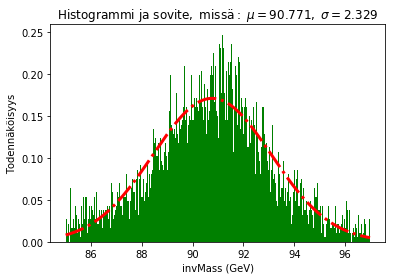

In [25]:
min = 85
max = 97

# Rajataan haluttu alue. rajMass sisältää nyt kaikki massat, jotka jäävät min ja max arvojen välille
rajMass = iMass[(min < iMass) & (iMass < max)]

# Lasketaan normaalijakauman µ & sigma käyttäen scipyn norm.fit-funktiota
(mu, sigma) = norm.fit(rajMass)

# Histogrammi rajatusta datasta. Huomaa, että tässä data on normalisoitu
n, bins, patches = plt.hist(rajMass, 300,normed = 1, facecolor='g')

# mlab.normpdf laskee normaalijakauman y-arvon annetuilla µ:llä ja sigmalla,
# piirretään samaan kuvaan histogrammin kanssa myös normaalijakauma
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r-.', linewidth=3)


plt.xlabel('invMass (GeV)')
plt.ylabel('Todennäköisyys')
plt.title(r'$\mathrm{Histogrammi\ ja\ sovite,\ missä:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))

plt.show()

Noudattaako invariantin massan jakauma normaalijakaumaa?

Miten datan rajaaminen vaikuttaa jakaumaan? (Kokeile rajata dataa eri tavoin muuttamalla min ja max arvoja)


Entä miksi data täytyy normalisoida? (Testaa itse miten kuvaaja muuttuu jos poistat normalisoinnin)

## Ja sitten poikittaisliikemääristä ja pseudorapiditeetista

Poikittaisliikemäärällä  $ p_t$ tarkoitetaan liikemäärää, joka on kohtisuorassa säteen kulkusuuntaan nähden. Se on laskettavissa
x- ja y -suuntaisista liikemääristä tuttuun tapaan vektorianalyysiä käyttäen, mutta sen suuruus löytyy myös suoraan ladatusta datasta.

Pseudorapiditeettia kuvaa datassa oleva sarake Eta $(\eta)$, ja se käytännössä kertoo hiukkasen kulman suhteessa säteeseen. Myöhemmin vastaan tuleva kuva esittää $\eta$:n ja kulman suhteen hieman tarkemmin.

Tarkastellaan ensin miltä poikittaisliikemäärien jakauma näyttää

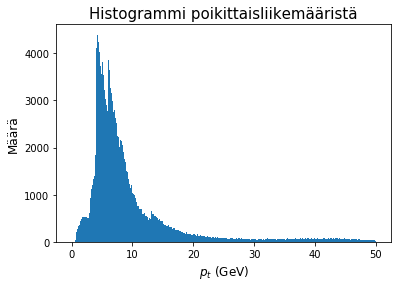

In [3]:
# Muuttuja allPt sisältää nyt kaikki poikittaisliikemäärät
allPt = pd.concat([data.pt1, data.pt2]) 
# pandas paketin concat-komento (concatenate) yhdistää valitut tiedot
# (concat palauttaa tässä DataFrame tyyppisen muuttujan, tässä tapauksessa se tosin sisältää vain yhden 
# nimeämättömän sarakkeen, joten myöhemmin ei tarvitse valita haluamaansa saraketta allPt-muuttujasta)R


# Piirretään histogrammi näistä

plt.hist(allPt, bins=400, range = (0,50))
plt.xlabel('$p_t$ (GeV)', fontsize = 12)
plt.ylabel('Määrä', fontsize = 12)
plt.title('Histogrammi poikittaisliikemääristä', fontsize = 15)

plt.show()

Näyttäisi siltä, että suurin osa arvoista sijoittuu välille [0,10]. Käytetään tätä rajaamaan seuraavaksi piirrettävää dataa

In [4]:
# ehto määrittää, minkä energian alapuolella olevat tapahtumat valitaan (pt < ehto)
ehto = 10

# sPt = data[(np.absolute(data.pt1) > ehto) & (np.absolute(data.pt2) > ehto)]
pPt = data[(data.pt1 < ehto) & (data.pt2 < ehto)]

# Tallennetaan kaikki käsiteltävät etat ja poikittaisliikemäärät muuttujiin
allpPt = pd.concat([pPt.pt1, pPt.pt2])
allEta = pd.concat([pPt.eta1, pPt.eta2])

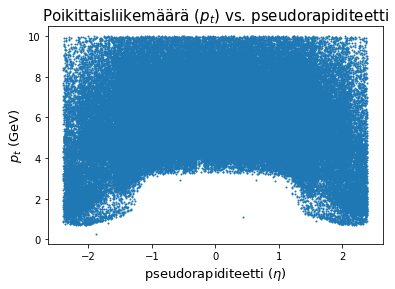

In [5]:
# ja piirretään niistä scatterplot

plt.scatter(allEta, allpPt, s=1)

plt.ylabel('$p_t$ (GeV)', fontsize=13)
plt.xlabel('pseudorapiditeetti ($\eta$)', fontsize=13)
plt.title('Poikittaisliikemäärä ($p_t$) vs. pseudorapiditeetti', fontsize=15)

plt.show()

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/Pseudorapidity.svg/800px-Pseudorapidity.svg.png"
alt = "Pseudorapiditeetti" style = "height: 300px" align="left">

Vasemmalla olevasta kuvasta näkee pseudorapiditeetin ($\eta$) ja kulman ($\theta$) välisen yhteyden (jos $\eta = 0$, niin tapahtuma on
kohtisuorassa säteen kulkusuuntaan nähden).

Vertaile tätä kuvaa yllä olevaan kuvaajaan ja pohdi alla olevia kysymyksiä.

### Kysymyksiä

Mistä kuvaajan muoto johtuu? Miksei pieniliikemääräisiä hiukkasia havaita $\eta$:n arvoilla [-1,1]?

Miksi poikittaisliikemäärän käsite ylipäätään on kiinnostava?